[![View filled on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/timpdotd/LabIAGI_1950722/tree/408d4077a2ed2906ba3a3145586fc761e9f4380e/Esercitazione_7)
[![Open filled In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Sapienza-AI-Lab/esercitazione7-22-23/blob/main/Introduction_to_NeuralNetworks_using_PyTorch.ipynb)


This Exercise will help in MNIST dataset and MLP. Cross validation, Grid search and Random sampling.

## What is MNIST dataset?
MNIST stands for Modified National Institute of Standards and Technology and is a database of 60,000 small square 28x28 pixel grayscale images. MNIST handwritten digits dataset is the most used for learning Image Recognition. It is labeled in the sense that each image of a handwritten digit has the corresponding numeral value attached to it. This helps our Algorithm/Neural Network to learn which image stands for which number (0-9) and to learn hidden patterns in human writing.

While the handwritten MNIST is the most popular one, there are 6 different extended variations of MNIST:


1.   Fashion MNIST
2.   3D MNIST
3.   EMNIST
4.   Skin Cancer MNIST
5.   Sign Language MNIST
6.   Colorectal histology MNIST

The MNIST dataset consists of greyscale handwritten digits. Each image is 28x28 pixels, you can see a sample below


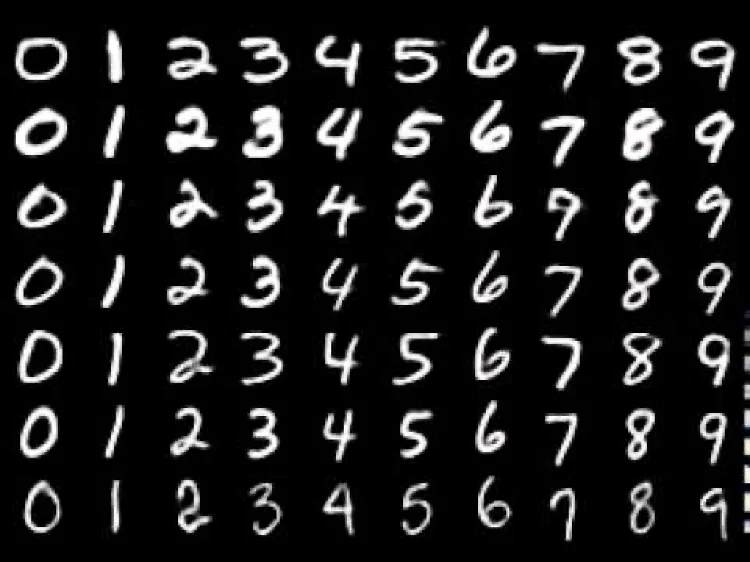

## Import Libraries

We import the necessary libraries and functions for building our first neural network here.

In [ ]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, SubsetRandomSampler, ConcatDataset
from torchvision import datasets, transforms

import numpy as np
import sklearn
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# This is when we use GPU instance to run colab.
# How to change Runtime in colab??
# Go to Runtime-> Change Runtime type -> Hardware Accelerator -> GPU

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print('Using PyTorch version:', torch.__version__, ' Device:', device)

Using PyTorch version: 2.0.0+cu117  Device: cuda


## Data Preparation MNIST Dataset  
Pytorch has a very convenient way to load the MNIST data using datasets.MNIST instead of data structures such as NumPy arrays and lists. Deep learning models use a very similar Data Structure called a Tensor. When compared to arrays tensors are more computationally efficient and can run on GPUs too. We will convert our MNIST images into tensors when loading them. There are lots of other transformations that you can do using `torchvision.transforms` like Reshaping, normalizing, etc. on your images but we won't need that since MNIST is a very primitive dataset.

Our goal is to build a neural network that can take one of these images and predict the digit in the image.

First up, we need to get our dataset. This is provided through the `torchvision` package. The code below will download the MNIST dataset, then create training and test datasets for us. Check the [torchvision.dataset.MNIST](https://pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html) documentation to knwo how to set the parameters.

In [ ]:
# Define a transform to normalize the data
# HINT: you have to transform the images to tensors and then normalize them to have zero mean
transform = transforms.Compose([
    # your code here
]

# Download and load the training data
trainset = # load MNIST data here using dataset.MNIST
train_loader = # create a data loader here
trainset

SyntaxError: invalid syntax (1559337504.py, line 2)

The following code loads `validationset` in the same way as we loaded trainset to evaluate themodel performace before we run the model on our testset. This time you don't need to download the dataset. Remember to use the same transforms defined for the training set.

In [ ]:
# Download and load the test data
validationset = # load the validation data MNIST
validation_loader = # create a data loader here
validationset

The following code loads `testset` in the same way as we loaded `trainset`

In [ ]:
# Download and load the test data
testset = # load the validation data MNIST
test_loader = # create a data loader here
testset

We have the training data loaded into trainloader and we make that an iterator with iter(trainloader). Later, we'll use this to loop through the dataset for training, like




```python
for image, label in train_loader:
    ## do things with images and labels
```


You'll notice I created the trainloader with a batch size of 64, and shuffle=True. The batch size is the number of images we get in one iteration from the data loader and pass through our network, often called a batch. And shuffle=True tells it to shuffle the dataset every time we start going through the data loader again. But here I'm just grabbing the first batch so we can check out the data. We can see below that images is just a tensor with size (64, 1, 28, 28). So, 64 images per batch, 1 color channel, and 28x28 images.

In [ ]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

Shows one data sample from the `train_loader`

In [ ]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

## Multilayer Perceptron on MNIST Dataset
A multilayer perceptron has several Dense layers of neurons in it, hence the name multi-layer.

These artificial neurons/perceptrons are the fundamental unit in a neural network, quite analogous to the biological neurons in the human brain. The computation happening in a single neuron can be denoted by the equation. `N = Wx + b`, where x denotes the input to that neuron and `W,b` stands for `weight` and `bias` respectively. These two values are set at random initially and then keep on updating as the network learns.
Each neuron in a layer is connected to every other neuron in its next layer. In MLPs, data only flows forwards hence they are also sometimes called Feed-Forward Networks.
There are 3 basic components:

1. Input Layer- The input layer would take in the input signal to be processed. In our case, it's a tensor of image pixels.

2. Output Layer- The output layer does the required task of classification/regression. In our case, it outputs one of the 10 classes for digits 0-9 for a given input image.

3. Hidden Layers - There is an arbitrary number of hidden layers in between the input and output layer that do all the computations in a Multilayer Perceptron. The number of hidden layers and the number of neurons can be decided to keep in mind the fact that one layer's output is the next layer's input.

Now, we know the basics of architecture. To understand the working better let's take the example of our use case- image classification with MNIST.

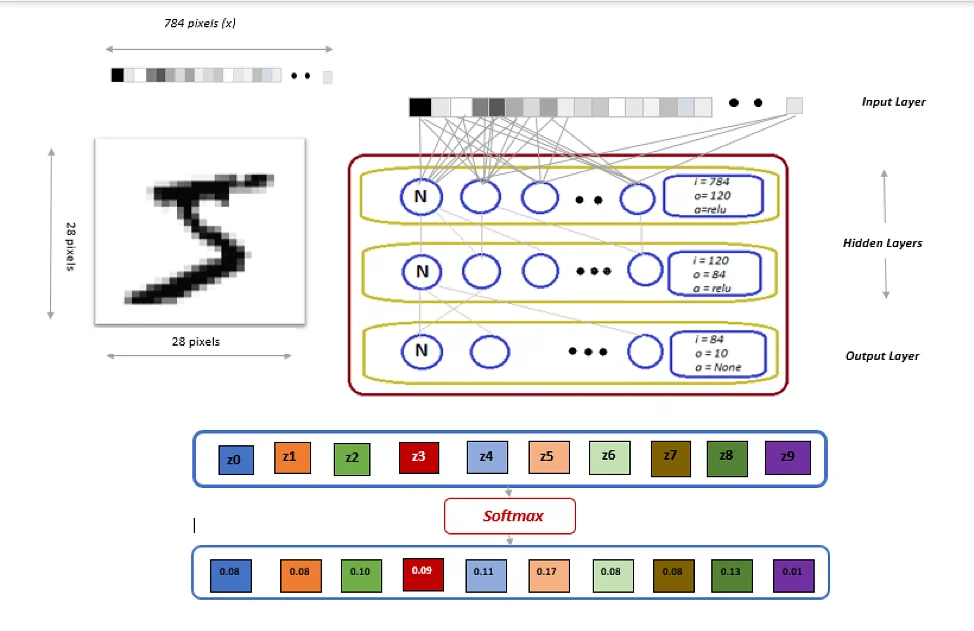

Let's break down the process into different steps:

The pixels in the 28X28 handwritten digit image are flattened to form an array of 784-pixel values. Nothing heavy going on here, just decompressing a 2D array into one dimension.
The function of the input layer is just to pass-on the input (array of 784 pixels) into the first hidden layer.
The first hidden layer is where the computations start. It has 120 neurons that are each fed the input array. After calculating the result from the formula stated above, each neuron generates an output that is fed into each neuron of the next layer. Except, there is a little twist here. Instead of just simply passing on the result of Wx+b, an activation is calculated on this result.
The activation function is used to clip the output in a definite range like 0-1 or -1 to 1, these ranges can be achieved by Sigmoid and Tanh respectively. The activation function we have used here is ReLu. The main advantage of using the ReLu function is that it does not activate all the neurons at the same time thus making it more computationally efficient than Tanh or Sigmoid.

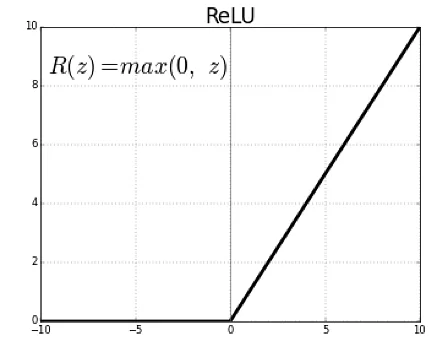

In short, ReLu clips all the negative values and keeps the positive values just the same.

The same thing happens in the second hidden layer. It has 84 neurons and takes 120 inputs from the previous layer. The output of this layer is fed into the last layer which is the Output Layer.
The Output Layer has only 10 neurons for the 10 classes that we have(digits between 0-9). There isn't any activation function in the output layer because we'll apply another function later.
The Softmax takes the output of the last layer(called logits) which could be any 10 real values and converts it into another 10 real values that sum to 1. Softmax transforms the values between 0 and 1, such that they can be interpreted as probabilities. The maximum value pertains to the class predicted by the classifier. In our case, the value is 0.17 and the class is 5.


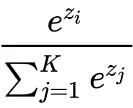

The process described above is a single forward pass through the network and instead of just sending one image as input in a pass, a batch of images is fed in a single pass.

### Warm-up step
Flatten the batch of images images. Then build a multi-layer network with 784 input units, 256 hidden units, and 10 output units using random tensors for the weights and biases. For now, use a sigmoid activation for the hidden layer. Leave the output layer without an activation, we'll add one that gives us a probability distribution next.

#### Note: assemble the code for the forward pass of a two layer neural network, just to test the output range

In [ ]:
# your code here
def activation(x):
    # code here
    return activ

# Flatten the input images
inputs = images.view(images.shape[0], -1)

# Create parameters of weights w1,w2 and biases b1,b2


h = activation(torch.mm(inputs, w1) + b1)

out = torch.mm(h, w2) + b2
print(out.shape)

### Warm-up step:
Implement a function softmax that performs the softmax calculation and returns probability distributions for each example in the batch. Note that you'll need to pay attention to the shapes when doing this. If you have a tensor a with shape (64, 10) and a tensor b with shape (64,), doing a/b will give you an error because PyTorch will try to do the division across the columns (called broadcasting) but you'll get a size mismatch. The way to think about this is for each of the 64 examples, you only want to divide by one value, the sum in the denominator. So you need b to have a shape of (64, 1). This way PyTorch will divide the 10 values in each row of a by the one value in each row of b. Pay attention to how you take the sum as well. You'll need to define the dim keyword in torch.sum. Setting dim=0 takes the sum across the rows while dim=1 takes the sum across the columns.

In [ ]:
## your code here
def softmax(x):
    # code here
    return softmax

probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

## How does the network learn?

After a single pass through the network, the prediction of the model for that batch of images is compared with the actual labels of those images, and a loss is calculated. Based on the value of this loss, a gradient flow backward through the neural network to update weights(W and b) in each layer. This process is called `Backpropagation`.

In the next iteration, the neural network would do a slightly better job while predicting. This process of forward-pass and backpropagation keeps on repeating as we try to minimize our loss and we the end of our training.

## Building MLP with PyTorch
PyTorch provides a module nn that makes building networks much simpler. Here I'll show you how to build the same one as above with 784 inputs, 256 hidden units, 10 output units and a softmax output.
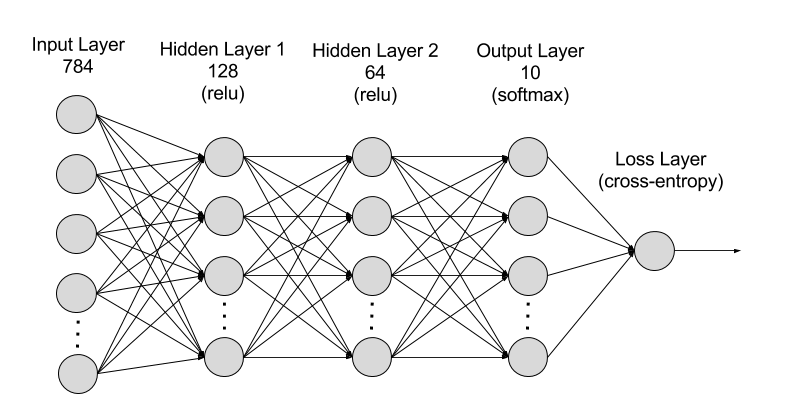

Let's define the network as a Python class. We have to write the __init__() and forward() methods, and PyTorch will automatically generate a backward() method for computing the gradients for the backward pass.

Finally, during Backpropagation, we update the weights according to the loss throughout the iterations. We basically try to minimize loss as we move ahead through our training. This process is called optimization. Optimizers are algorithms that try to find the optimal way to minimize the loss by navigating the surface of our loss function.

we define an optimizer to update the model parameters based on the computed gradients. We select `SGD` as the optimization algorithm, and set learning rate to 0.01. Note that there are [several different options](http://pytorch.org/docs/optim.html#algorithms) for the optimizer in PyTorch that we could use instead of SGD.

In [ ]:
class MLP(nn.Module):
    def __init__(self,input_size = 784, output_size = 10, layers=[128,64]):
        super().__init__()
        # construct the layers for MLP

    def forward(self, x):
        # construct the forward propagation mechanism here
        return F.log_softmax(, dim=1)

model = MLP().to(device)

In [ ]:
# Your code here for the optimizer (SGD) and the criterian for crossentropy
optimizer = # insert optimizer instantiation
criterion = # insert loss instantiation
print(model)

## Initializing weights and biases
The weights and such are automatically initialized for you, but it's possible to customize how they are initialized. The weights and biases are tensors attached to the layer you defined, you can get them with model.fc1.weight for instance. We will cover weights initialization in a future lesson, for now consider it as granted.

In [ ]:
print(model.fc1.weight)
print(model.fc1.bias)

## Image viewing helper Functions

The following functions will help in viewing the image and reconstructiong images from the tensors. These are already filled and provided for your understanding. You can also experiment (optional) with some inbuilt pytorch functions to view images and process tensors.


In [ ]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

## Forward pass
Now that we have a network, let's see what happens when we pass in an image.

In [ ]:
# Grab some data
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.to(device)
labels = labels.to(device)

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels)
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
view_classify(img.cpu(), softmax(ps).cpu())
print(ps)

In [ ]:
img_idx = int(np.random.randint(64))
img = images[img_idx]
imshow(img.cpu().view(1, 28, 28))

## Train the model (back propagation)
Training the model is an iterative process which contains many epoches. For each epoch we will repeatly load batches of data, perform forward propagation, calculate cost, perform back propagation using the optimizer.

In [ ]:
def train(epoch, log_interval=200):
    # Set model to training mode
    model.train()

    # Loop over each batch from the training set
    for batch_idx, (data, target) in enumerate(train_loader):
        # Copy data to GPU if needed


        # Zero gradient buffers


        # Pass data through the network


        # Calculate loss


        # Backpropagate


        # Update weights


        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item()))

We also validate the model on the validation data we have prepared in the beginning. Fill the function `validate` with your code and calculate the loss and accuracy vectors

In [ ]:
def validate(loss_vector, accuracy_vector):
    model.eval()
    val_loss, correct = 0, 0


    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        val_loss, correct, len(validation_loader.dataset), accuracy))

Now we are ready to train our model using the train() function. An epoch means one pass through the whole training data. After each epoch, we evaluate the model using validate().

### Note: you can modify the visualization using tqdm package if you prefer

In [ ]:
%%time
epochs = 10

lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)

Let's now visualize how the training progressed.

1. Loss is a function of the difference of the network output and the target values. We are minimizing the loss function during training so it should decrease over time.
2. Accuracy is the classification accuracy for the test data.

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(np.arange(1,epochs+1), lossv)
plt.title('validation loss')

plt.figure(figsize=(5,3))
plt.plot(np.arange(1,epochs+1), accv)
plt.title('validation accuracy');

## Exercise 1:

Now that you have the basic nework down, it's time to run the visualization on tensorboard. Try to visualize both the validation and the training loss/accuracy on the same plot and check if, or when, the model overfits.

## Exercise 2:

To improve the model, try adding another layer and add a regularization loss to the current training loss to balance the increased flexibility.

## Appendix:

### Hyperparameter Tuning

In machine learning, [hyperparameter optimization](https://en.wikipedia.org/wiki/Hyperparameter_optimization) or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are learned.

The same kind of machine learning model can require different constraints, weights or learning rates to generalize different data patterns. These measures are called hyperparameters, and have to be tuned so that the model can optimally solve the machine learning problem. Hyperparameter optimization finds a tuple of hyperparameters that yields an optimal model which minimizes a predefined loss function on given independent data. The objective function takes a tuple of hyperparameters and returns the associated loss.
Cross-validation is often used to estimate this generalization performance.

There are several approaches to perform hyperparameter optimisation.
1. Grid Search
2. Random Search
3. Bayesian
4. Gradient-based optimization
5. Evolutionary
6. Early-Stopping

As we will see in the next few lessons, grid search is not efficient in this case (and in general...) even if it is simple to understand. In this exercise we will use the random search.

#### Some libraries
* **Determined**, a DL Training Platform includes grid/Random search for PyTorch and TensorFlow (Keras and Estimator) models.
* **H2O** AutoML provides grid/Random search over algorithms in the H2O open source machine learning library.
* **Katib** is a Kubernetes-native system that includes grid/Random search.
* **scikit-learn** is a Python package that includes grid/Random search.
* **Talos** includes grid/Random search for Keras.
* **Tune** is a Python library for distributed hyperparameter tuning and supports grid/Random search.
* **Skorch** is a python pachage built on integrating Scikit-learn and Pytorch for hyper parameter optimisation and more.


### Random Search

Random Search replaces the exhaustive enumeration of all combinations by selecting them randomly. This can be simply applied to the discrete setting described above, but also generalizes to continuous and mixed spaces. It can outperform Grid search, especially when only a small number of hyperparameters affects the final performance of the machine learning algorithm.

In this case, the optimization problem is said to have a low intrinsic dimensionality.Random Search is also embarrassingly parallel, and additionally allows the inclusion of prior knowledge by specifying the distribution from which to sample.

Despite its simplicity, random search remains one of the important base-lines against which to compare the performance of new hyperparameter optimization methods.

In [ ]:
# your code for Randomsearch goes here